# 1. Introducción

Nuestro cliente Beta Bank nos ha pedido un modelo para predecir cuando un cliente va a abandonar el banco.
Necesitan saber que clientes son más probables a abandonar el banco y requieren que nuestro modelo tenga una fiabilidad de al menos 59%.
Nos han proporcionado una base de datos de los clientes con las características de comportamiento y nos indicaron cuales clientes han abandonado el banco.

# 1.1 Carga de datos y limpieza

Empezamos por cargar la información que vamos a usar para nuestro modelo y limpiamos los datos para poder entrenar el modelo.

In [1]:
import pandas as pd #Importamos librería básica para leer dataset
from sklearn.model_selection import train_test_split #Importar función para dividr datasets de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler #Importamos función para estandarizar los datos numéricos
from sklearn.tree import DecisionTreeClassifier #Importamos nuestro modelo de algoritmo a entrenar
from sklearn.metrics import confusion_matrix #Importamos función para conocer la matriz de predicciones verdaderas megativas contra verdaderas positivas
from sklearn.metrics import recall_score #Importamos función que califica la sensibilidad del modelo
from sklearn.metrics import precision_score #Importamos función que califica la precisión del modelo
from sklearn.metrics import f1_score #Importamos función F1 este combina la sensibilidad y precisión, y califica la relación de estas calificaciones dentro de nuestro modelo
from sklearn.utils import shuffle #Importamos función para barajear datos al azar
import matplotlib.pyplot as plt #Importamos librería para graficar
from sklearn.metrics import precision_recall_curve #importamos función para trazar linea de precisicón vs sensibilidad
from sklearn.metrics import roc_curve #Importamos función para trazar la curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/datasets/Churn.csv') #Leemos dataset

In [3]:
print(df.info()) #Imprimimos información disponible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [4]:
print(df.isna().sum()) #Revisamos datos nulos en nuestro DataFrame
print()
print(df.duplicated().sum()) #Revisamos duplicados dentro del DataFrame

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

0


In [5]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median()) #Llenamos los datos nulos con la mediana para que no nos afecte los cálculos que estaremos realizando con el DataFrame

In [6]:
print(df.isna().sum()) #Validamos que se hayan llenado los datos en Tenure correctamente

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# 2. División de data sets para entrenar nuestro modelo

Ahora que tenemos la información limpia y lista para ser usada, ya podemos dividirla para porder entrenar nuestro modelo.
Validar el modelo para mejorarlo y tener un set de prueba para elegir un mejor modelo.
También estandarizarelos la información usando el modelo One Hit y Escalando las características numéricas.

In [7]:
variables_categoricas = ['Geography', 'Gender'] #Dividimos la data en las variables necesarias que nos ayudaran a entrenar el modelo
variables_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
variables_no_informativas = ['RowNumber', 'CustomerId', 'Surname'] #Estas variables_no_informativas no nos sirven para poder entrenar el modelo

In [8]:
df_informativo = df.drop(variables_no_informativas, axis=1)
print(df_informativo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
None


In [9]:
df_para_modelo = pd.get_dummies(df_informativo, drop_first=True, columns=variables_categoricas)
print(df_para_modelo)
#Preparamos las variables categoricas para poder entrenar el modelo. Usamos get_dummies para volver las variables_categoricas en booleanos para entrenamiento.
#Dentro de get_dummies usamos el parámetro drop_first para quitar la primera columna de los datos booleanos categóricos ya que sería redundante tener esta información

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42     2.0       0.00              1          1   
1             608   41     1.0   83807.86              1          0   
2             502   42     8.0  159660.80              3          1   
3             699   39     1.0       0.00              2          0   
4             850   43     2.0  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39     5.0       0.00              2          1   
9996          516   35    10.0   57369.61              1          1   
9997          709   36     7.0       0.00              1          0   
9998          772   42     3.0   75075.31              2          1   
9999          792   28     5.0  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1          

In [10]:
train_valid, test =  
train, valid = train_test_split(train_valid, test_size=0.25, random_state=12345)
#Dividimos los datos para entrenar el modelo

In [11]:
features_train = train.drop('Exited', axis=1)
target_train = train['Exited']

features_valid = valid.drop('Exited', axis=1)
target_valid = valid['Exited']

features_test = test.drop('Exited', axis=1)
target_test = test['Exited']
#Definimos las características y objetivos para entrenar el modelo

In [12]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
#Validamos el equilibrio de los datos para el modelo

(6000, 11)
(2000, 11)
(2000, 11)


# 3. Validación y calificación del modelo

Realizamos validaciones de nuestro modelo para conocer que tan sensible y preciso es.
Nos interesa tener una precisión de mínimo un 59% aqui veremos que tan lejos estamos de nuestro objetivo.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

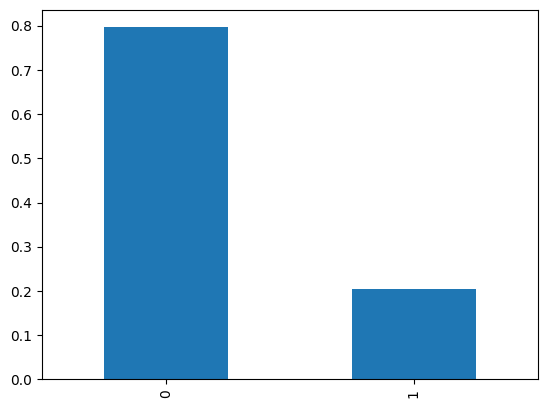

In [13]:
exited_frequency = df_para_modelo['Exited'].value_counts(normalize=True)
print(exited_frequency)
exited_frequency.plot(kind='bar')

#Revisamos la frecuencia en la que los usuarios abandonan el servicio del banco, para saber que tan desequilibrados están los datos.
#Con la gráfica podemos observar que tenemos más datos sobre clientes que conservan sus products bancarios. 
#La data está sesgada hacia clientes que no abandonan al banco.

In [14]:
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_train, target_train)
predicted_valid = model_tree.predict(features_valid)

confusion_matrix = confusion_matrix(target_valid, predicted_valid)
print(confusion_matrix)

#Revisamos con la matrix de confusión la viabilidad del modelo. En este caso tenemos una gran cantidad de verdaderos negativos.
#Esto nos indica que el modelo piensa que los clientes no abandonan los servicios del banco; cuando realmente si se abandonan.

[[1389  220]
 [ 197  194]]


In [15]:
sensibilidad = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
print(f"Recall/sensibilidad del modelo:", sensibilidad)
print()
print(f"Precisión del modelo:", precision)

#Revisamos la sensibilidad y precision del modelo, en este caso el modelo está prediciendo correctamente menos de la mitad de las respuesta.
#El modelo tiene una precisión del 46% lo cual es baja para el modelo, necesitamos crear una mayor precisión.

Recall/sensibilidad del modelo: 0.4961636828644501

Precisión del modelo: 0.46859903381642515


In [16]:
f1 = f1_score(target_valid, predicted_valid)

print(f"F1:", f1)

#El valor de F1 es bajo, lo que nos indica que la mayoría de las predicciones se van a hacer de modo incorrecto.
#Usar un árbol de decisión no va a ser valido, tendremos que usar un modelo más robusto de clasificación

F1: 0.4819875776397516


In [17]:
model_balanced = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_balanced.fit(features_train, target_train)
predicted_valid = model_balanced.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

#Hacemos un balance de clases para ver si nuetro modelo mejor.
#Esta mejora es muy pequeña aún no estamos cerca de nuestro objetivo

F1: 0.4708926261319535


In [18]:
for trees in range (1,31): 
    forest_model = RandomForestClassifier(n_estimators=trees, random_state=12345, class_weight='balanced') #Almacenamos nuestro modelo e indicamos un estado de azar, también definimos la cantidad de arboles dentro de nuestro bosque
    forest_model.fit(features_train, target_train) #Creamos nuestro modelo entrenado para Bosque de Decisiones
    print("Cantidad de árboles:", trees)
    print("Entrenamiento: ", forest_model.score(features_train, target_train)) #Aqui validamos la exactitud del bosque
    print("Validación: ", forest_model.score(features_valid, target_valid))
    print("Prueba: ", forest_model.score(features_test, target_test))
    print()
    #Creamos un for para poder conocer cuántos árboles me van a brindar la validación más alta de mi modelo.
    #En este caso tener 25 árboles dentro del modelo nos dá la validación más alta
    #1 sólo árbol nos da un F1 muy bajo

Cantidad de árboles: 1
Entrenamiento:  0.929
Validación:  0.793
Prueba:  0.79

Cantidad de árboles: 2
Entrenamiento:  0.9283333333333333
Validación:  0.823
Prueba:  0.81

Cantidad de árboles: 3
Entrenamiento:  0.9651666666666666
Validación:  0.8285
Prueba:  0.8175

Cantidad de árboles: 4
Entrenamiento:  0.9571666666666667
Validación:  0.841
Prueba:  0.8235

Cantidad de árboles: 5
Entrenamiento:  0.9786666666666667
Validación:  0.8375
Prueba:  0.8295

Cantidad de árboles: 6
Entrenamiento:  0.9723333333333334
Validación:  0.8495
Prueba:  0.8325

Cantidad de árboles: 7
Entrenamiento:  0.9846666666666667
Validación:  0.8485
Prueba:  0.8375

Cantidad de árboles: 8
Entrenamiento:  0.9801666666666666
Validación:  0.853
Prueba:  0.8355

Cantidad de árboles: 9
Entrenamiento:  0.9863333333333333
Validación:  0.8555
Prueba:  0.8415

Cantidad de árboles: 10
Entrenamiento:  0.9835
Validación:  0.8555
Prueba:  0.84

Cantidad de árboles: 11
Entrenamiento:  0.9888333333333333
Validación:  0.8545
Prueb

In [19]:
forest_model = RandomForestClassifier(n_estimators=25, random_state=12345, class_weight='balanced')
forest_model.fit(features_train, target_train)
predicted_valid = forest_model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

#Validamos la sensibilidad y precisión del modelo usando un bosque.
#Nuestro valor de f1 mejora significativamente, pero aún hace falta equilibrar las clases.
#También indicamos en el modelo que ambas clases tienen el mismo peso para no sesgar los resultados.

F1: 0.5504


# 4. Ajuste de clases y equilibrio

Sabemos que hay un sesgo de información donde el modelo es más probable a predecir que los clientes no abandonarán el banco.
Esta sensibilidad hace que nuestro modelo no sea preciso, es necesario equilibrar las clases para mejorar la precisión.

In [20]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0] #Dividimos las características y objetivos por clase
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + ([features_ones] * repeat)) #Concateneamos o juntamos las características y objetivos aumentado la clase menos frecuente
    target_upsampled = pd.concat([target_zeros] + ([target_ones] * repeat))

    features_upsampled, target_upsampled = shuffle( #Barajeamos la información de la data para que se presente al azar
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample( #Usamos la función definida para aumentar la clase rara 40 veces
    features_train, target_train, 40               
)

#Definimos una función para poder hacer menos rara la clase '1' que corresponde a los clientes que abandonan.

In [21]:
forest_model.fit(features_upsampled, target_upsampled)
predicted_valid_up = forest_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_up))

#Validamos la calificación del modelo luego de ajustar la clase rara con un Sobremuestreo
#Si ajustamos la clase más rara y repetimos los datos gasta 40 veces llegamos a la precisión que buscamos

F1: 0.5956284153005464


In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.5
)

#Definimos una función para disminuir la clase más frecuente y entrenamos el modelo con un Submuestreo

In [23]:
forest_model.fit(features_downsampled, target_downsampled)
predicted_valid_down = forest_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_down))

#Validamos la calificación de sensibilidad y precisión basado en un Submuestro.
#Nuestro modelo ha mejorado mucho pero aún no llegamos al 59%, será mejor usar el Sobremuestreo

F1: 0.5841836734693878


In [24]:
features_upsampled_train, target_upsampled_train = upsample(
    features_train, target_train, 40)

features_upsampled_valid, target_upsampled_valid = upsample(
    features_valid, target_valid, 40)

features_upsampled_test, target_upsampled_test = upsample(
    features_test, target_test, 40)

#Usamos nuestro función ya definida para ajustar las clases para todos nuestros datasets pare el modelo

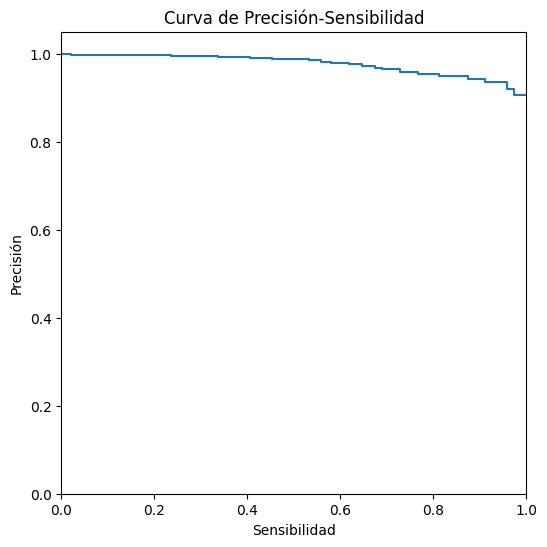

In [25]:
forest_model.fit(features_upsampled_train, target_upsampled_train)

probabilities_valid = forest_model.predict_proba(features_upsampled_valid)
precision, recall, thresholds = precision_recall_curve(
    target_upsampled_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva de Precisión-Sensibilidad')
plt.show()

#Revisamos la relación de la Precisión vs. Sensibilidad del modelo usando nuestras nuevas clases ya equilibradas.
#La precisión de nuestro modelo a incrementado significativamente y es sensible a la información provista

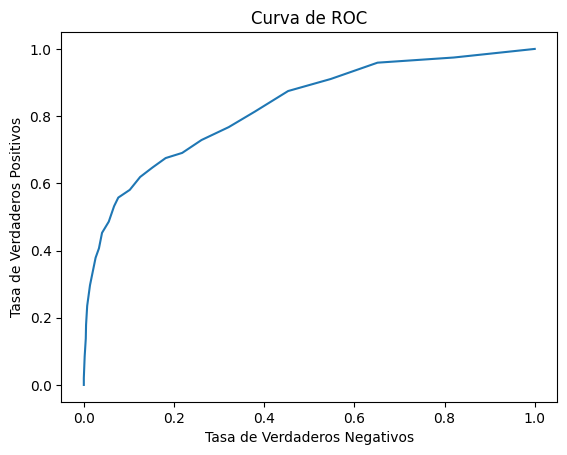

In [26]:
forest_model.fit(features_upsampled_train, target_upsampled_train)

probabilities_valid = forest_model.predict_proba(features_upsampled_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_upsampled_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('Tasa de Verdaderos Negativos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva de ROC')
plt.show()

#Vemos la relación de Verdaderos Positivos vs Verdaderos Negativos con nuestros nuevos data set y revisamos la relación.
#Nuestro modelo ha mejorado en la manera en que predice los resultados con mayor precisión

In [27]:
forest_model.fit(features_upsampled_train, target_upsampled_train)

probabilities_valid = forest_model.predict_proba(features_upsampled_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_upsampled_valid, probabilities_one_valid)

print("Espacio AUC ROC debajo de nuestra línea en gráfico:", auc_roc)

#El espacio debajo de nuestra curva es del 82% al ser tan cercano a 1 podemos decir que nuestro modelo es suficientemente robusto para este proyecto

Espacio AUC ROC debajo de nuestra línea en gráfico: 0.826467647615157


In [28]:
forest_model.fit(features_upsampled_train, target_upsampled_train)
predicted_valid_upsampled = forest_model.predict(features_upsampled_valid)

print('F1:', f1_score(target_upsampled_valid, predicted_valid_upsampled))

#Ahora que ya hemos ajustado las clases, tenemos una precisión de modelo del 71%
#Nuestro modelo ha mejorado de manera significativa y nos va a ser muy útil para lo que nos piden en el banco

F1: 0.7123310051872729


In [29]:
print("Entrenamiento: ", forest_model.score(features_upsampled_train, target_upsampled_train))
print("Validación: ", forest_model.score(features_upsampled_valid, target_upsampled_valid))
print("Prueba: ", forest_model.score(features_upsampled_test, target_upsampled_test))
print()
recall_forest = recall_score(target_upsampled_valid, predicted_valid_upsampled)
precision_forest = precision_score(target_upsampled_valid, predicted_valid_upsampled)
print(f"Recall/sensibilidad del modelo:", recall_forest)
print(f"Precisión del modelo:", precision_forest)
print('F1:', f1_score(target_upsampled_valid, predicted_valid_upsampled))

Entrenamiento:  0.9999439681739228
Validación:  0.5916864745782364
Prueba:  0.5901999678335924

Recall/sensibilidad del modelo: 0.5575447570332481
Precisión del modelo: 0.9860906932036639
F1: 0.7123310051872729


# 5. Conclusiones

Para poder llegar al modelo ideal en el que llegamos a tener una precisión del f1 0.59 tuvimos que ecperimentar con distintos modelos de decisión.

Al saber que un sólo árbol de decisión no iba a ser suficiente decidimos utilizar un bosque de decisciones para nuestro modelo.
Hicismo pruebas para llegar a la mejor bosque con un total de 25 árboles para mayor precisión en las predicciones.

Teniendo un modelo más preciso buscamos la manera de ajustar las clases para poder entrenar al modelo con el mejor dataset posible.

En este caso lo más conveniente fue utilizar un sobremuestreo de los datos que tenemos de la clase de clientes que abandonan el banco.

Ya teniendo la combinación ideal de datos hicimos validaciones nuevamente, dando como resultado un f1 de 0.71, mayor que lo que nos pedían en el banco.